In [81]:
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
mnist = tf.keras.datasets.mnist
import deepchem as dc
import deepchem.models.tensorgraph.layers as layers
import matplotlib.pyplot as plt
import seaborn as sbn

While the book uses the examples.tutorials.mnists input_data method, we will use the keras mnist data method.  First, the examples are deprecated, and might not work in the future.  Additionally this eliminates the need to manually download and store these datasets.  Also the keras version makes a nice test/train split for us.  :)

# Data Download and Visualization
The MNIST dataset is pretty clean, so there is no need for any real preprocessing like an autoencoder or the such to make the network perform well.  It might be useful for near 100% accuracy, but for this we will just use the raw input data

In [114]:
expected_outputs = 10
(X_train, y_train), (X_test, y_test) = mnist.load_data()
one_hot = OneHotEncoder(sparse=False)
y_train = one_hot.fit_transform(y_train.reshape(-1,1))
y_labels = y_test
y_test = one_hot.transform(y_test.reshape(-1,1))
train = dc.data.NumpyDataset(X_train, y_train)
test = dc.data.NumpyDataset(X_test,y_test)

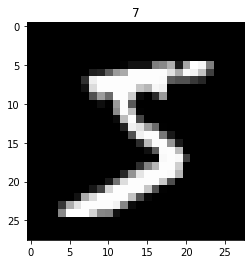

In [115]:
idx = 0
plt.title(label=y_labels[idx])
plt.imshow(X_train[idx], cmap='gray')

# Model Definition

In [116]:
model = dc.models.TensorGraph(model_dir="data")
# Define the Input and Output layers, which are flat
feature = layers.Feature(shape=(None, 28, 28))
labels = layers.Label(shape=(None, expected_outputs))

# General Model layers
#make_image = layers.Reshape(shape=(None, 28, 28), in_layer=feature)
conv2d_1 = layers.Conv2D(num_outputs=32, activation_fn=tf.nn.relu, in_layers=feature)
conv2d_2 = layers.Conv2D(num_outputs=64, activation_fn=tf.nn.relu, in_layers=conv2d_1)
flatten = layers.Flatten(in_layers=conv2d_2)
dense1 =  layers.Dense(out_channels=1024, activation_fn=tf.nn.relu, in_layers=flatten)
dense2 = layers.Dense(out_channels=expected_outputs, activation_fn=None, in_layers=dense1)

# Loss and scoring
# softmax layer takes labels and predicted values
smce = layers.SoftMaxCrossEntropy(in_layers=[labels, dense2])
loss = layers.ReduceMean(in_layers=smce)
model.set_loss(loss)
output = layers.SoftMax(in_layers=dense2)
model.add_output(output)

# Training Time

In [ ]:
model.fit(train, nb_epoch=10)

# Metrics 

In [ ]:
metric = dc.metrics.Metric(dc.metrics.accuracy_score)
train_scores = model.evaluate(train_dataset, [metric])
test_scores = model.evaulate(test_dataset, [metric])
print(train_scores, test_scores)